# Student Study Performance

Dans ce notebook, nous explorons un ensemble de données sur les performances académiques des élèves, en mettant l'accent sur les scores en mathématiques. Notre objectif est d'analyser les facteurs influençant ces performances et de construire un modèle prédictif.

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("study_performance.csv")

In [101]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Cleaning

# EDA

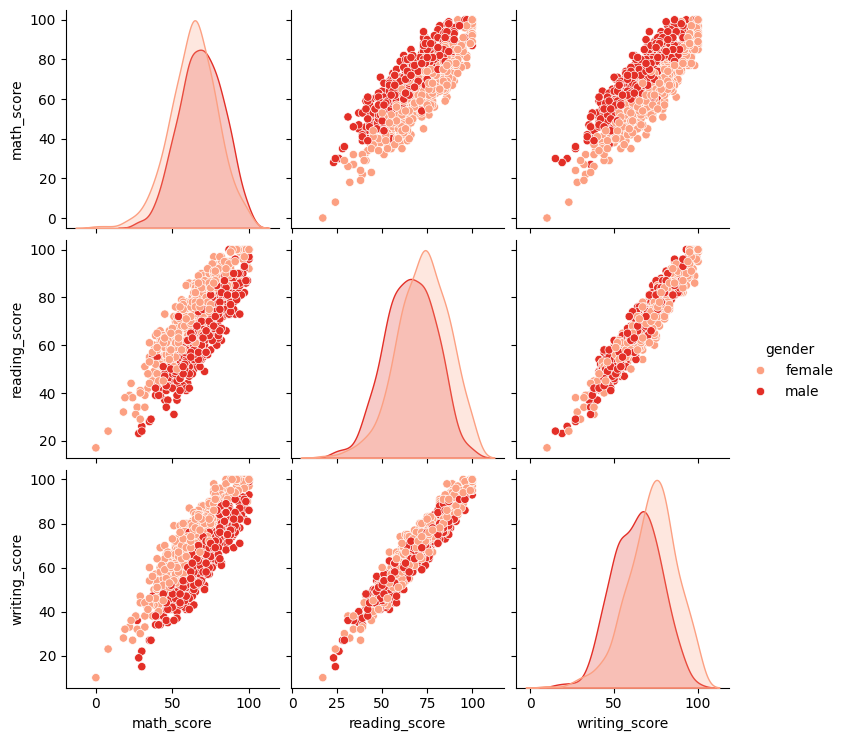

In [102]:
sns.pairplot(df,hue = 'gender', palette="Reds")
plt.show()

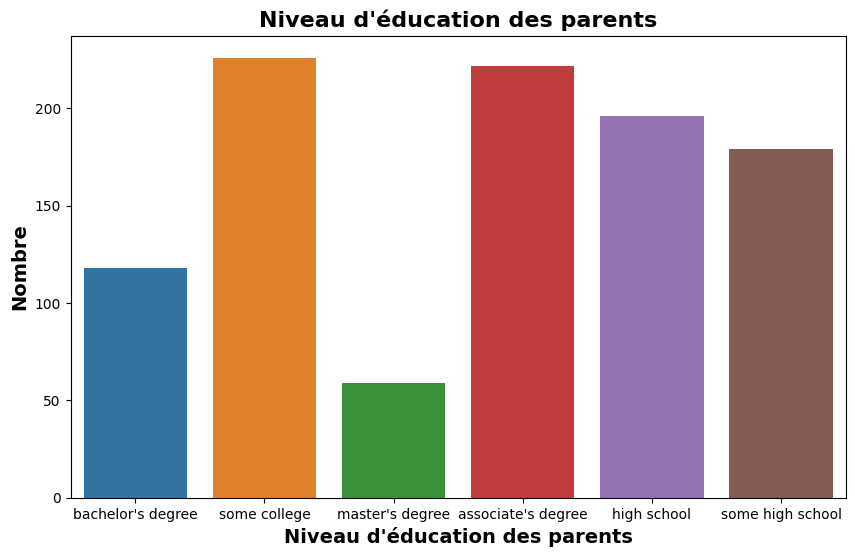

In [103]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un graphique à barres avec Seaborn
sns.countplot(data=df, x='parental_level_of_education', hue="parental_level_of_education")

# Titre du graphique
plt.title('Niveau d\'éducation des parents', fontsize=16, fontweight='bold')

# Libellés des axes x et y
plt.xlabel('Niveau d\'éducation des parents', fontsize=14, fontweight='bold')
plt.ylabel('Nombre', fontsize=14, fontweight='bold')

# Afficher le graphique
plt.show()

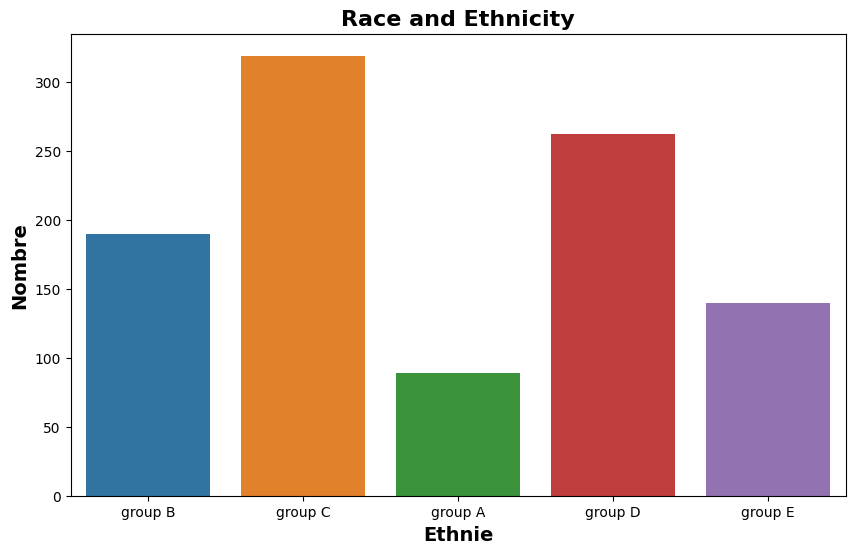

In [104]:
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer un graphique à barres avec Seaborn
sns.countplot(data=df, x='race_ethnicity', hue='race_ethnicity')

# Titre du graphique
plt.title('Race and Ethnicity', fontsize=16, fontweight='bold')

# Libellés des axes x et y
plt.xlabel('Ethnie', fontsize=14, fontweight='bold')
plt.ylabel('Nombre', fontsize=14, fontweight='bold')

# Afficher le graphique
plt.show()

# Pre Processing

In [105]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [106]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [107]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [108]:
X = preprocessor.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Machine Learning


Pourquoi utiliser une régression linéaire pour prédire le math score dans cette base de données :

1. **Simplicité et interprétabilité :** La régression linéaire est une méthode simple et interprétable qui permet de modéliser la relation entre une variable cible continue (dans ce cas, le score en mathématiques) et un ensemble de variables explicatives. Elle permet de quantifier l'impact individuel de chaque variable explicative sur la variable cible.

2. **Modélisation des relations linéaires :** La régression linéaire peut être utilisée pour comprendre les relations linéaires entre les variables. Par exemple, nous pourrions examiner comment le score en mathématiques varie en fonction du niveau d'éducation des parents ou du fait d'avoir complété ou non un cours de préparation au test.

3. **Prédiction :** La régression linéaire peut être utile pour la prédiction. Une fois que le modèle est ajusté aux données, il peut être utilisé pour prédire les scores en mathématiques pour de nouvelles observations, en utilisant les valeurs des variables explicatives.

4. **Diagnostic du modèle :** La régression linéaire permet également de diagnostiquer le modèle, en évaluant l'adéquation des données au modèle et en identifiant d'éventuelles violations des hypothèses, telles que la linéarité, l'homoscédasticité et la normalité des résidus.


In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [112]:
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(rmse))
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- R2 Score: {:.4f}".format(r2))

Model performance for Training set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


<Axes: xlabel='math_score'>

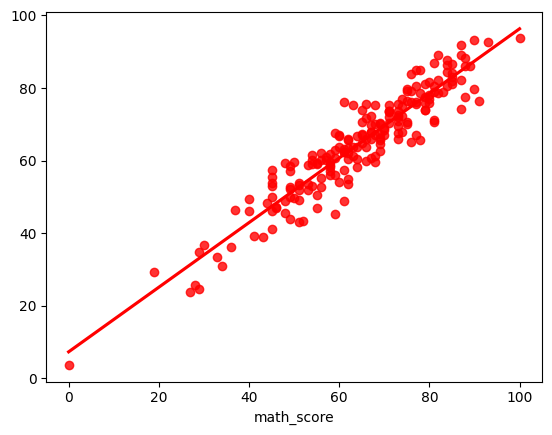

In [113]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')